In [4]:
import math #для выполнения математических операций
import numpy as np #для выполнения операций с многомерными массивами и математическими функциями
import itertools #предоставляет функции для работы с итерируемыми объектами

from functools import reduce #reduce применяет функцию к элементам последовательности, сводя ее к одному значению
from itertools import combinations #cоздает комбинации элементов заданной длины из итерируемого объекта

import matplotlib.pyplot as plt #для построения графиков
from matplotlib.patches import Polygon #используется для создания многоугольников
from matplotlib.collections import PatchCollection #используется для создания коллекций графических примитивов для построения на графике

## Задание 1

In [3]:
def visualize_polygons(polygon_iterator): 
    """
    Функция визуализации последовательность полигонов
    """
    fig, ax = plt.subplots() #объект рисунка, ax - объект осей (подграфика) для этого рисунка
    patches = []
    for polygon_vertices in polygon_iterator: #перебирает каждый полигон из polygon_iterator
        polygon = Polygon(polygon_vertices, closed=True) #Создание объекта Polygon с вершинами polygon_vertices. Параметр closed=True указывает, что полигон должен быть замкнутым.
        patches.append(polygon)

    p = PatchCollection(patches, alpha=0.4) #Создание коллекции патчей, patches.alpha=0.4 задает прозрачность для патчей
    ax.add_collection(p) #Добавление созданной коллекции патчей на оси ax
    ax.autoscale_view() #масштабирование осей
    ax.set_aspect('equal') #Установка равного соотношения масштабов по осям
    plt.show() 

## Задание 2

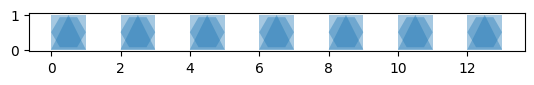

In [5]:
def gen_rectangle(start_x=0, start_y=0, width=1, height=1, gap=1):
    """
    Генерирует бесконечную последовательность прямоугольников 
    """
    x, y = start_x, start_y
    while True:
        yield [(x, y), (x + width, y), (x + width, y + height), (x, y + height)]
        x += width + gap

def gen_triangle(start_x=0, start_y=0, base=1, height=1, gap=1):
    """
    Генерирует бесконечную последовательность треугольниоков
    """
    x, y = start_x, start_y
    while True:
        yield [(x, y), (x + base / 2, y + height), (x + base, y)]
        x += base + gap

def gen_hexagon(center_x=0, center_y=0, side=1, gap=1):
    """
    Генерирует бесконечную последовательность шестиугольников
    """
    angle = 60
    while True:
        hexagon = []
        for i in range(6):
            angle_deg = angle * i
            x_i = (center_x + side * np.cos(np.radians(angle_deg)) / 2) + 0.5
            y_i = (center_y + side * np.sin(np.radians(angle_deg)) / 2) + 0.5
            hexagon.append((x_i, y_i)) 
        yield hexagon
        center_x += (1 * side) + gap


# генерация последовательностей с помощью itertools.islice для получения 7 фигур каждой формы
rectangles = itertools.islice(gen_rectangle(), 7)
triangles = itertools.islice(gen_triangle(), 7)
hexagons = itertools.islice(gen_hexagon(), 7)

# Объединение трех последовательностей
combined_shapes = itertools.chain(rectangles, triangles, hexagons)

# Визуализация
visualize_polygons(combined_shapes)

### Задание 3

In [6]:
def tr_translate(polygon, offset):
    # Параллельный перенос полигона
    return [(x + offset[0], y + offset[1]) for x, y in polygon]


def tr_rotate(polygon, angle):
    # Поворот полигона
    rad = math.radians(angle)
    return [(x * math.cos(rad) - y * math.sin(rad), x * math.sin(rad) + y * math.cos(rad)) for x, y in polygon]


def tr_symmetry(polygon, axis):
    # Симметрия полигона относительно заданной оси
    if axis == 'x':
        return [(x, -y) for x, y in polygon]
    elif axis == 'y':
        return [(-x, y) for x, y in polygon]
    raise ValueError("Axis must be 'x' or 'y'")



def tr_homothety(polygon, scale):
    # Гомотетия полигона с заданным масштабом
    return [(x * scale, y * scale) for x, y in polygon]


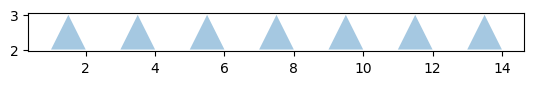

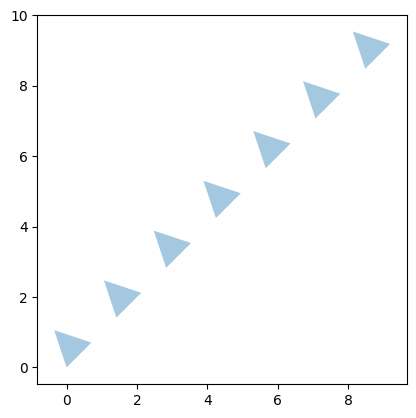

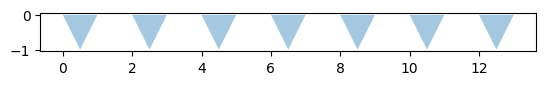

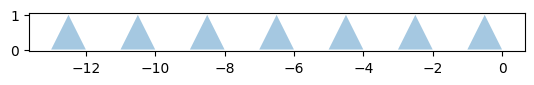

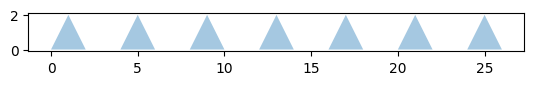

In [7]:
# пример последовательности полигонов
polygons = list(itertools.islice(gen_triangle(), 7))

translated_polygons = list(map(lambda p: tr_translate(p, (1, 2)), polygons))
rotated_polygons = list(map(lambda p: tr_rotate(p, 45), polygons))
symmetric_polygons_x = list(map(lambda p: tr_symmetry(p, 'x'), polygons))
symmetric_polygons_y = list(map(lambda p: tr_symmetry(p, 'y'), polygons))
homothety_polygons = list(map(lambda p: tr_homothety(p, 2), polygons))


visualize_polygons(translated_polygons)
visualize_polygons(rotated_polygons)
visualize_polygons(symmetric_polygons_x)
visualize_polygons(symmetric_polygons_y)
visualize_polygons(homothety_polygons)

# 4.1

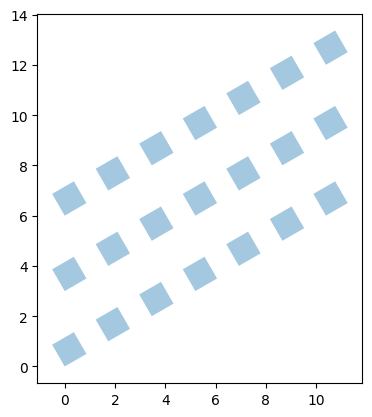

In [8]:
polygons = list(itertools.islice(gen_rectangle(), 7)) #Создание списка polygons, который содержит первые 7 прямоугольников


visualize_polygons(itertools.chain(
    list(map(lambda p: tr_rotate(p, 30), polygons)), #поворот 30 градусов ко всем прямоугольникам 
    list(map(lambda p: tr_translate(tr_rotate(p, 30), (0, 3)), polygons)), #поворот 30 градусов ко всем прямоугольникам, с вектором смещения (0, 3) к каждому из них
    list(map(lambda p: tr_translate(tr_rotate(p, 30), (0, 6)), polygons)), #Аналогично предыдущему, но с вектором смещения (0, 6)
))

# 4.2

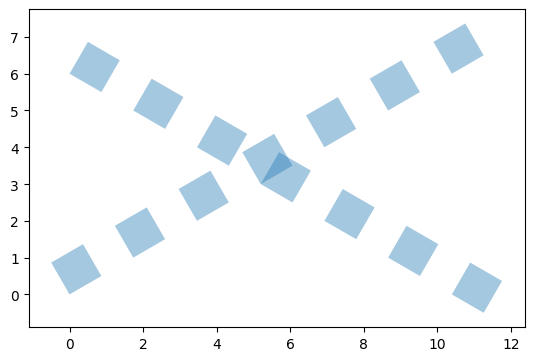

In [9]:
polygons = list(itertools.islice(gen_rectangle(), 7)) ##Создание списка polygons, который содержит первые 7 прямоугольников


visualize_polygons(itertools.chain(
    list(map(lambda p: tr_rotate(p, 30), polygons)), #поворот 30 градусов ко всем прямоугольникам 
    list(map(lambda p: tr_translate(tr_rotate(p, -30), (0, 6)), polygons)), #поворот -30 градусов ко всем прямоугольникам, с вектором смещения (0, 6)
))

# 4.3

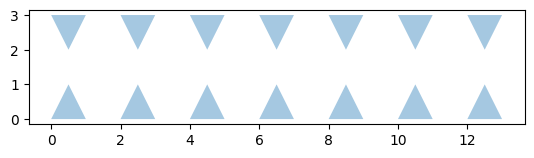

In [10]:
polygons = list(itertools.islice(gen_triangle(), 7))


visualize_polygons(itertools.chain(
    polygons,
    list(map(lambda p: tr_translate(tr_symmetry(p, "x"), (0, 3)), polygons)), #выполняет отражение относительно оси X, смещение на вектор (0, 3)
))

# 4.4

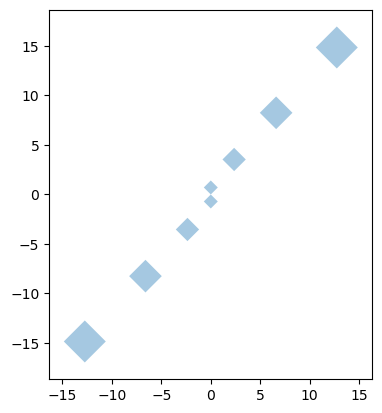

In [413]:
# генерация последовательности полигонов
polygons = list(itertools.islice(gen_rectangle(), 4))

# определение масштаба, создание вариатиности в размере
scaling_factors = np.linspace(1, 3, len(polygons))

# применяем масштаб к каждому полигону, затем поворот каждого из них так
scaled_and_rotated_polygons = [
    tr_rotate(tr_homothety(polygon, factor), 45)  # поворот внутри пересек. линий
    for polygon, factor in zip(polygons, scaling_factors)
]

_scaled_and_rotated_polygons = [
    tr_symmetry(tr_symmetry(polygon, "x"), "y") for polygon in scaled_and_rotated_polygons #выполняет отражение относительно оси X и Y
]

# визуализация
visualize_polygons(itertools.chain(scaled_and_rotated_polygons, _scaled_and_rotated_polygons))


## Задание 5

In [82]:
def is_convex(polygon):
    """
    Проверяет, является ли многоугольник выпуклым
    """
    def cross_product(p1, p2, p3):
        """
        Возвращает векторное произведение двух векторов (p2 - p1) и (p3 - p1)
        """
        return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

    n = len(polygon)
    if n < 3:
        return False

    direction = 0
    for i in range(n):
        p1, p2, p3 = polygon[i], polygon[(i + 1) % n], polygon[(i + 2) % n]
        current_direction = cross_product(p1, p2, p3)
        if current_direction != 0:
            if direction == 0:
                direction = current_direction
            elif direction != current_direction:
                return False
    return True

def flt_convex_polygon(polygons):
    """
    Фильтрует только выпуклые многоугольники
    """
    return filter(is_convex, polygons)

def flt_angle_point(polygons, point):
    """
    Фильтрует фигуры, имеющие хотя бы один угол, совпадающий с заданной точкой
    """
    return filter(lambda polygon: any(np.array_equal(vertex, point) for vertex in polygon), polygons)

def flt_square(polygons, min_square):
    """
    Фильтрует фигуры с площадью менее заданной
    """
    def calculate_square(polygon):
        """
        Вычисляет площадь многоугольника
        """
        x = [point[0] for point in polygon]
        y = [point[1] for point in polygon]
        return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

    return filter(lambda polygon: calculate_square(polygon) <= min_square, polygons)

def flt_short_side(polygons, min_side_length):
    """
    Фильтрует фигуры, имеющие кратчайшую сторону менее заданного значения
    """
    def calculate_side_length(polygon):
        """
        Вычисляет длину кратчайшей стороны многоугольника
        """
        side_lengths = [np.linalg.norm(np.array(polygon[i]) - np.array(polygon[(i + 1) % len(polygon)])) for i in range(len(polygon))]
        return min(side_lengths)

    return filter(lambda polygon: calculate_side_length(polygon) > min_side_length, polygons)

def flt_point_inside(polygons, point):
    """
    Фильтрует выпуклые многоугольники, включающие заданную точку внутри себя
    """

    def is_point_inside(polygon, point):
        """
        Проверяет, включает ли многоугольник заданную точку
        """
        n = len(polygon)
        inside = False
        p1x, p1y = polygon[0]
        for i in range(n + 1):
            p2x, p2y = polygon[i % n]
            if point[1] > min(p1y, p2y):
                if point[1] <= max(p1y, p2y):
                    if point[0] <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (point[1] - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                            if (p1x == p2x) or (point[0] <= xinters):
                                inside = not inside
            p1x, p1y = p2x, p2y
        return inside

    return filter(lambda polygon: is_convex(polygon) and is_point_inside(polygon, point), polygons)


def flt_polygon_angles_inside(polygons, target_polygon):
    """
    Фильтрует выпуклые многоугольники, включающие хотя бы один из углов заданного многоугольника.
    """
    def has_angle_inside(polygon, target_polygon):
        """
        Проверяет, включает ли многоугольник хотя бы один из углов заданного многоугольника.
        """
        for vertex in target_polygon:
            if is_point_inside(polygon, vertex):
                return True
        return False

    return filter(lambda polygon: is_convex(polygon) and has_angle_inside(polygon, target_polygon), polygons)



In [13]:
# генерация последовательности полигонов
polygons = list(itertools.islice(gen_rectangle(), 4))

In [59]:
# Пример: два квадрата (1*1) и 2 треугольника (1 - с площаью 1 и 1 с площадью 0.5)
polygons = [
    ((0, 0), (0, 1), (1, 1), (1, 0)),
    ((2, 2), (2, 3), (3, 3), (3, 2)),
    ((0, 0), (1, 1), (2, 0)),
    ((2, 1), (3, 3), (3, 2)),
]

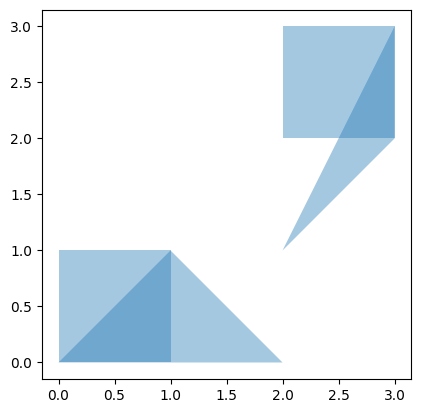

In [36]:
# проверка: площадь меньше 2 - все фигуры
filtered_polygons = flt_square(polygons, 2)
visualize_polygons(filtered_polygons)

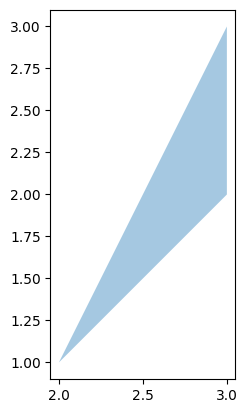

In [48]:
# проверка: площадь меньше 0.6 - только 1 треугольник
filtered_polygons = flt_square(polygons, 0.6)
visualize_polygons(filtered_polygons)

## Задача 9

### 9.1

In [218]:
def zip_polygons(*iterators):
    """
    Объединяет несколько последовательностей полигонов в одну последовательность
    """
    zipped_polygons = []
    for polygons in zip(*iterators):
        zipped_polygons.extend(polygons)
    return zipped_polygons

In [219]:
# создаем два треугольника
iterator1 = [((1, 1), (2, 2), (3, 1)), ((11, 1), (12, 2), (13, 1))]
# еще два треугольника
iterator2 = [((1, 1), (2, 0), (3, 1)), ((11, 1), (12, 0), (13, 1))]

# склеиваем
zipped_polygons = zip_polygons(iterator1, iterator2)
print(zipped_polygons)

[((1, 1), (2, 2), (3, 1)), ((1, 1), (2, 0), (3, 1)), ((11, 1), (12, 2), (13, 1)), ((11, 1), (12, 0), (13, 1))]


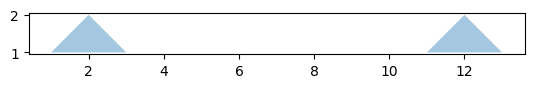

In [220]:
visualize_polygons(iterator1)

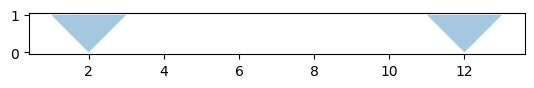

In [221]:
visualize_polygons(iterator2)

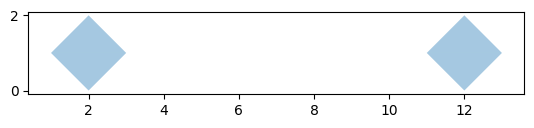

In [222]:
# объединенные треугольники  
visualize_polygons(zipped_polygons)

### 9.2

In [223]:
def count_2D(start, steps):
    """
    Генерирует координаты точек в двумерном пространстве на основе начальной точки и шагов.
    """
    x, y = start
    step_x, step_y = steps[0]  # Берем только первый шаг
    while True:
        yield x, y
        x += step_x
        y += step_y


In [224]:
# Пример использования
start = (1, 1)
steps = [(1, 2)]

generator = count_2D(start, steps)
result = [next(generator) for _ in range(3)]
print(result)


[(1, 1), (2, 3), (3, 5)]


### 9.3

In [225]:
def zip_tuple(*iterators):
    """
    Объединяет несколько последовательностей кортежей в одну последовательность кортежей.
    """
    zipped_tuples = []
    for items in zip(*iterators):
        zipped_tuples.append(tuple(items))
    return tuple(zipped_tuples)


In [226]:
iterator1 = [(1, 1), (2, 2), (3, 3), (4, 4)]
iterator2 = [(2, 2), (3, 3), (4, 4), (5, 5)]
iterator3 = [(3, 3), (4, 4), (5, 5), (6, 6)]

result = zip_tuple(iterator1, iterator2, iterator3)
print(result)

(((1, 1), (2, 2), (3, 3)), ((2, 2), (3, 3), (4, 4)), ((3, 3), (4, 4), (5, 5)), ((4, 4), (5, 5), (6, 6)))
